In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/zickert/SingleParticleAnalysis')
from ClassFiles.Denoiser import Denoiser
import mrcfile
from ClassFiles.ut import locate_gt, unify_form, create_single_folder
saves_path = '/mnt/data/zickert/SPA/Saves/Denoiser/All_EM'
denoiser = Denoiser(saves_path, load=True, cp=None) #  Checkpoint manually changed to step 15000
pdb_id = '5A0M'

INFO:tensorflow:Restoring parameters from /mnt/data/zickert/SPA/Saves/Denoiser/All_EM/Data/model-15000
Save restored


In [2]:
def vis(data):
    plt.imshow(np.maximum(0, data.squeeze()[..., 45]))

In [17]:
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()
gt = unify_form(gt)
gt /= np.sum(np.abs(gt))

In [32]:
Noise = '02'# '016' #'01' # '02'
if Noise == '01':
    reg_p = '003'
elif Noise == '012':
    reg_p = '0075'
elif Noise == '016':
    reg_p = '015'
elif Noise == '02':
    reg_p = '03'

    
path_em = '/mnt/data/zickert/MRC_Data/Data/Data_0{n}_10k/eval/EM/5A0M/5A0M_mult0{n}_class001.mrc'.format(n=Noise)
path_AR = '/mnt/data/zickert/MRC_Data/Data/Data_0{n}_10k/eval/AR/5A0M/{reg_p}/5A0M_mult0{n}_class001.mrc'.format(n=Noise, reg_p=reg_p)
with mrcfile.open(path_em) as mrc:
    em_final = mrc.data.copy()
em_final = em_final[None, ..., None]
den = denoiser.evaluate(em_final)

folder = '/mnt/data/zickert/MRC_Data/Data/Data_0{n}_10k/misc/Denoiser/5A0M/'.format(n=Noise)
create_single_folder(folder)

path_den = folder + '5A0M_mult0{n}_denoised.mrc'.format(n=Noise)

with mrcfile.new(path_den, overwrite=True) as mrc:
     mrc.set_data(den.copy().squeeze())
     mrc.voxel_size = 1.5

with mrcfile.open(path_AR) as mrc:
    ar = mrc.data.copy()

-645.936
78.5903
981.839
534.2259375


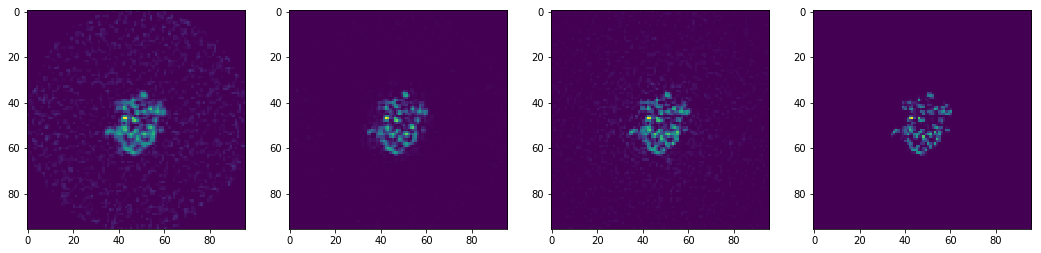

In [34]:
plt.figure(figsize=(18, 5))
plt.subplot(141)
vis(em_final)
print(np.sum(em_final))
#plt.colorbar()
plt.subplot(142)
vis(den)
print(np.sum(den))
#plt.colorbar()
plt.subplot(143)
vis(ar)
print(np.sum(ar))
#plt.colorbar()
plt.subplot(144)
vis(gt)
print(np.sum(gt) * float(Noise) * 0.01) #  remember data was generated from gt * float(Noise) * 0.01
#plt.colorbar()